In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.manifold import TSNE
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

<h1>Data Exploration</h1>

<h2>Data Cleaning</h2>

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_excel(r'C:\Users\Rohit Varre\Desktop\MliS\ML lab\Assignment 2\trainDataset.xls')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 120 entries, ID to original_ngtdm_Strength
dtypes: float64(108), int64(11), object(1)
memory usage: 375.1+ KB


In [6]:
df.iloc[:,:13].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             400 non-null    object 
 1   pCR (outcome)                  400 non-null    int64  
 2   RelapseFreeSurvival (outcome)  400 non-null    float64
 3   Age                            400 non-null    float64
 4   ER                             400 non-null    int64  
 5   PgR                            400 non-null    int64  
 6   HER2                           400 non-null    int64  
 7   TrippleNegative                400 non-null    int64  
 8   ChemoGrade                     400 non-null    int64  
 9   Proliferation                  400 non-null    int64  
 10  HistologyType                  400 non-null    int64  
 11  LNStatus                       400 non-null    int64  
 12  TumourStage                    400 non-null    int

In [7]:
# Dropping and rearranging columns
df.drop(['pCR (outcome)'],axis = 1, inplace = True)
cols = list(df.columns)
cols[2],cols[11] = cols[11],cols[2]
temp = cols[1]
cols.remove(temp)
cols.append(temp)
df = df[cols]

In [8]:
df.head()

,ID,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,RelapseFreeSurvival (outcome)
0,TRG002174,2,0,0,0,1,3,3,1,1,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,

<h3>Count of Null values</h3>

In [9]:
# The number of null values in a column
null = []
for i in df.columns:
    if 999 in df[i].unique():
        check = df[i].value_counts()[999]
        print(i,check)
        null.append(i)

PgR 1
HER2 1
TrippleNegative 1
ChemoGrade 3
Proliferation 2
HistologyType 3
LNStatus 1


<h3>Treating Null values</h3>

In [10]:
# Replacing the null values by mode as the null values are only in categorical features
sif = SimpleImputer(missing_values=999, strategy='mean')
sic = SimpleImputer(missing_values=999, strategy='median')
ID = df['ID']
out = df['RelapseFreeSurvival (outcome)']
cat_cols = df.columns[1:10]
float_cols = df.columns[10:-1]

In [11]:
#Imputing values for continuous data
sic.fit(df[cat_cols])
sif.fit(df[float_cols])

df_cats = pd.DataFrame(sic.transform(df[cat_cols]),columns=cat_cols)
df_floats = pd.DataFrame(sif.transform(df[float_cols]),columns=float_cols)

df = pd.concat([df_cats.reset_index(drop=True),df_floats.reset_index(drop=True)],axis=1)
df.insert(0,'ID',ID)
df['RelapseFreeSurvival (outcome)'] = out

In [12]:
df.head()

,ID,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,RelapseFreeSurvival (outcome)
0,TRG002174,2.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263.0,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.67025

In [13]:
df.head()

,ID,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,RelapseFreeSurvival (outcome)
0,TRG002174,2.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263.0,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.67025

In [14]:
y = pd.DataFrame(df['RelapseFreeSurvival (outcome)'])
X = df.drop(['RelapseFreeSurvival (outcome)','ID'],axis = 1)
X.head()

,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,2.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263.0,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.43

<h2>Data Visualization</h2>

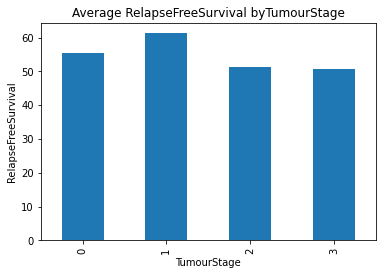

   TumourStage  RelapseFreeSurvival (outcome)
0          1.0                      55.452381
1          2.0                      61.232456
2          3.0                      51.190000
3          4.0                      50.708333


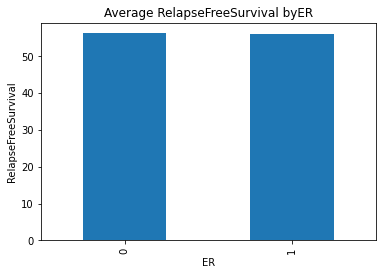

    ER  RelapseFreeSurvival (outcome)
0  0.0                      56.231431
1  1.0                      56.098765


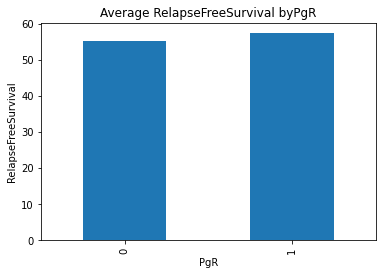

   PgR  RelapseFreeSurvival (outcome)
0  0.0                      55.341702
1  1.0                      57.374224


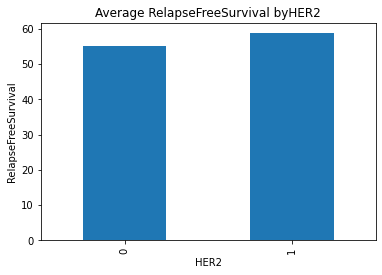

   HER2  RelapseFreeSurvival (outcome)
0   0.0                      54.998182
1   1.0                      58.715333


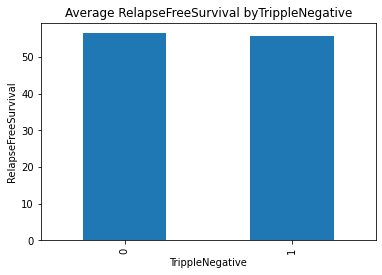

   TrippleNegative  RelapseFreeSurvival (outcome)
0              0.0                      56.418539
1              1.0                      55.640351


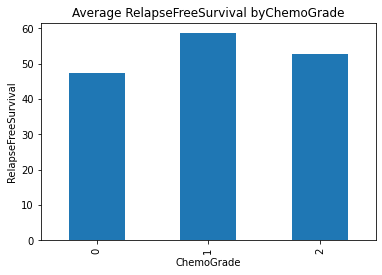

   ChemoGrade  RelapseFreeSurvival (outcome)
0         1.0                      47.333333
1         2.0                      58.578723
2         3.0                      52.780675


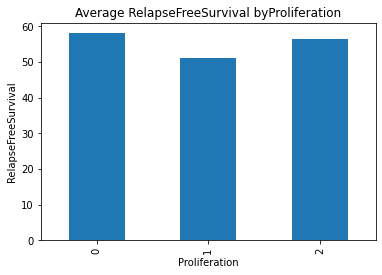

   Proliferation  RelapseFreeSurvival (outcome)
0            1.0                      58.039548
1            2.0                      51.194444
2            3.0                      56.415493


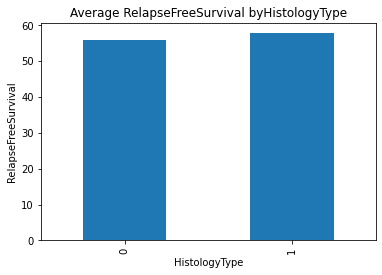

   HistologyType  RelapseFreeSurvival (outcome)
0            1.0                      55.894380
1            2.0                      57.790179


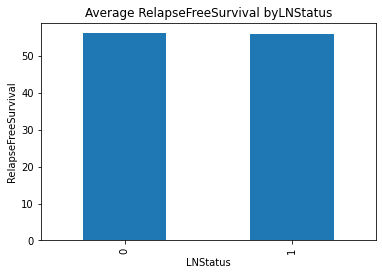

   LNStatus  RelapseFreeSurvival (outcome)
0       0.0                      56.188802
1       1.0                      56.133013


In [15]:
# Average RFS value with respect to various categorical features
check = pd.DataFrame
for i,col in enumerate(df.columns[1:10]):
    check = df.groupby(col,as_index=False)['RelapseFreeSurvival (outcome)'].mean()
    check['RelapseFreeSurvival (outcome)'].plot(kind='bar')
    plt.title('Average RelapseFreeSurvival by' + col)
    plt.xlabel(col)
    plt.ylabel("RelapseFreeSurvival")
    plt.show()
    print(check)

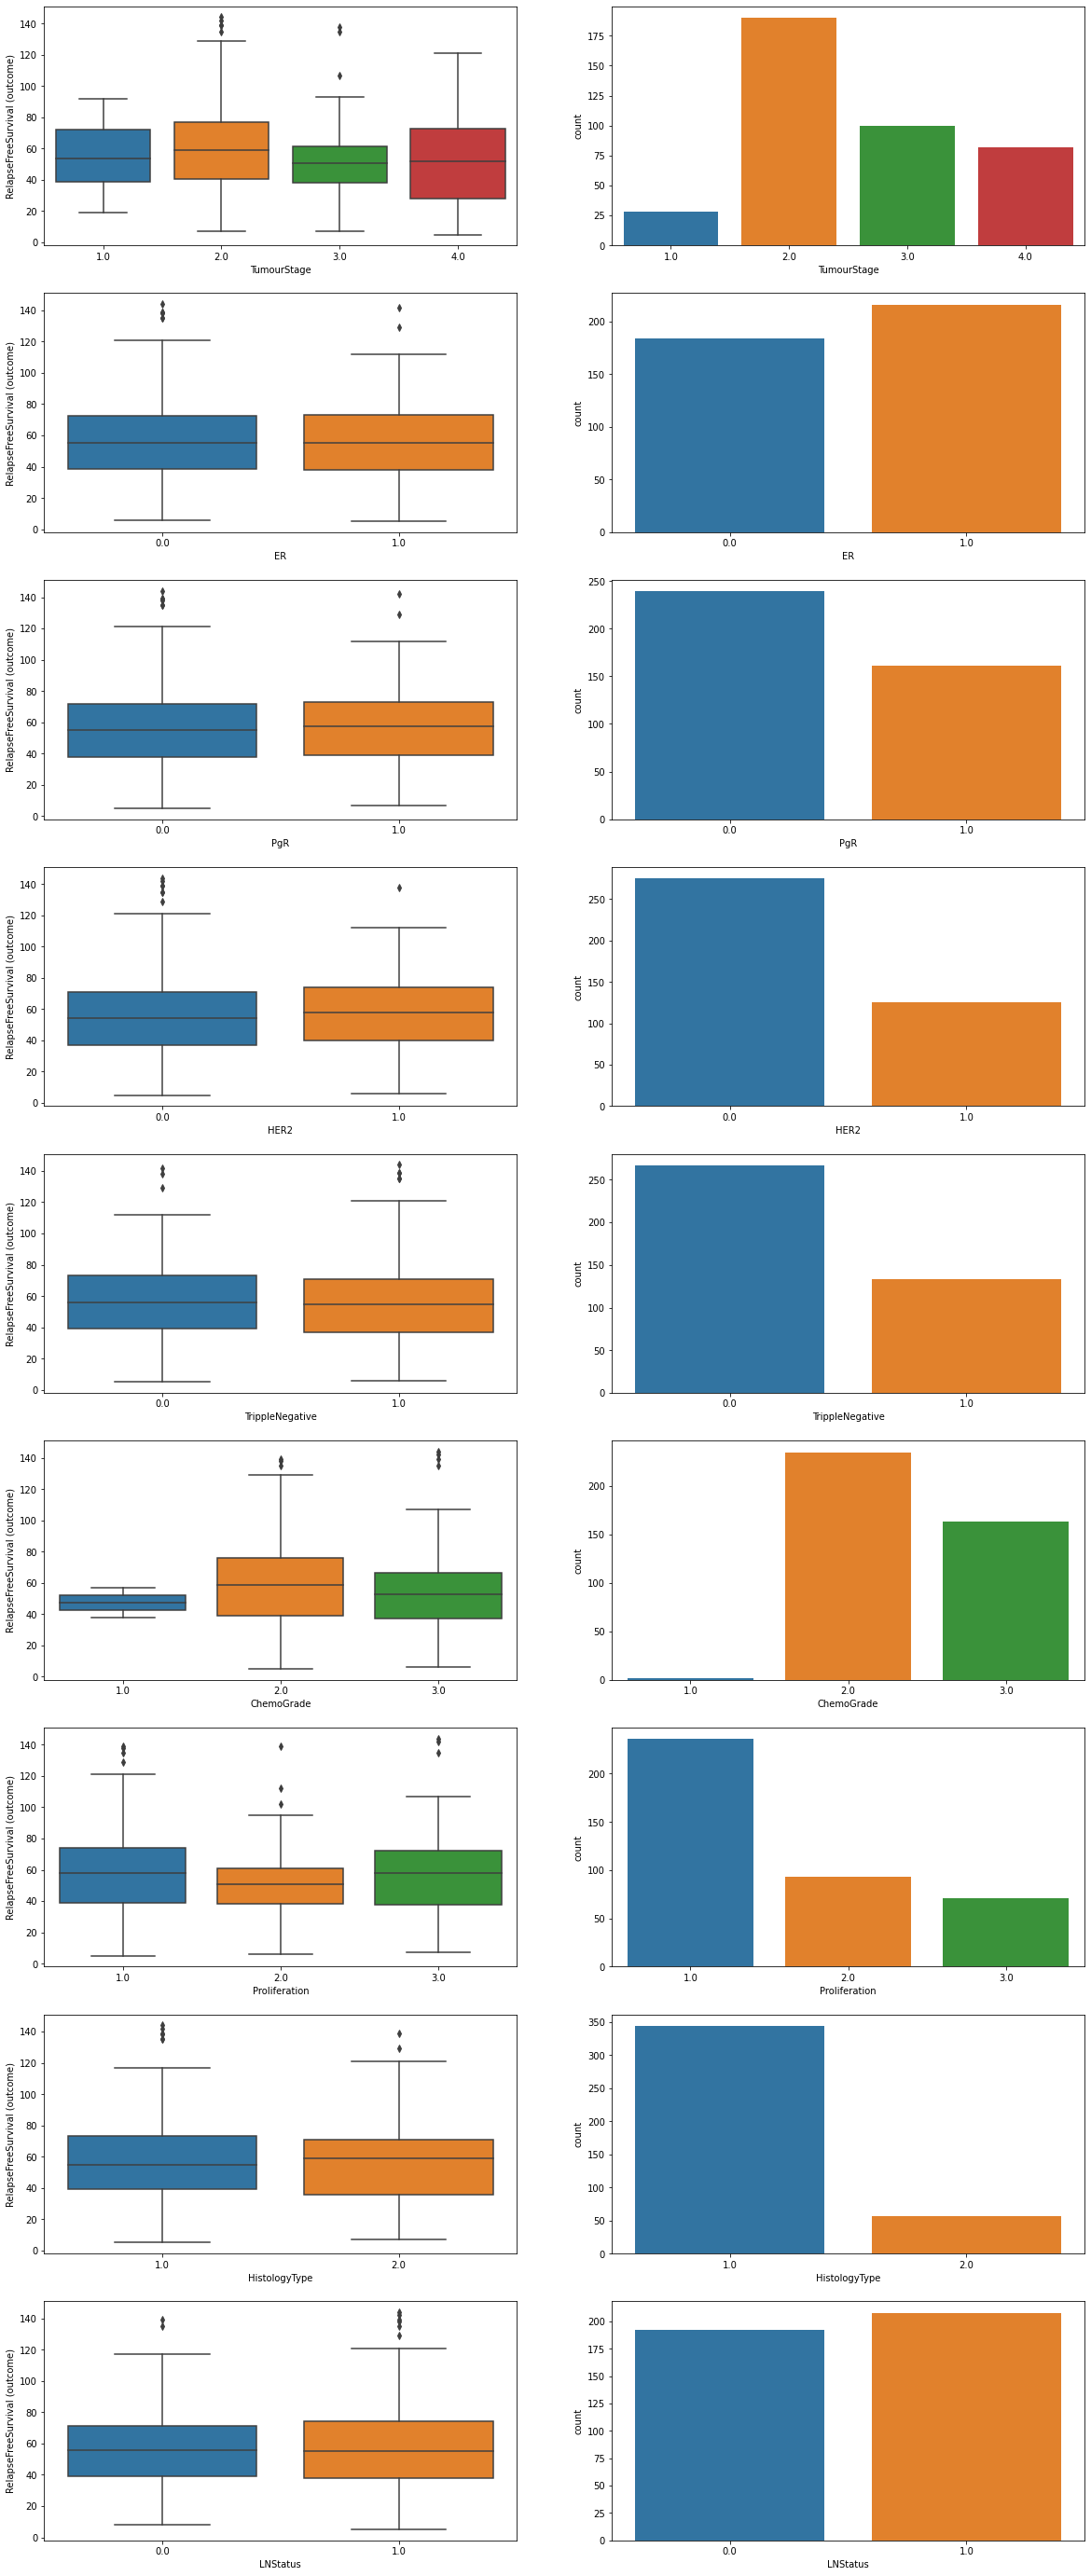

In [16]:
# The distribuion of RFS with respect to categorical features and the frequency of classes
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(20,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
for i, col in enumerate(df.columns[1:10]):
    sns.boxplot(y='RelapseFreeSurvival (outcome)', x=col, data = df, ax=axes[i][0])
    sns.countplot(x=col, data = df, ax=axes[i][1])

In [17]:
# fig, ax = plt.subplots(nrows=20, ncols=6, figsize=(300,560))
# fig.subplots_adjust(hspace =.2, wspace=.2)
# ax = ax.ravel()
# for i, col in enumerate(X.columns[1:]):
#     ax[i].plot(X[col],y,'or',markersize = 15)

<h1>Feature Selection</h1>

<h2>Correlation Matrix</h2>

<h3>Kendall</h3>

In [18]:
# Kendall's correlation on the continous features
corrMat_kendall = df.iloc[:,10:].corr(method = 'kendall')
corrMat_kendall = pd.DataFrame(corrMat_kendall)
corrMat_kendall.sort_values(by = 'RelapseFreeSurvival (outcome)',ascending = False,inplace = True)
corr_kendall = pd.DataFrame(corrMat_kendall['RelapseFreeSurvival (outcome)'])
corr_kendall.reset_index(inplace=True)
corr_kendall.head()

,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


In [19]:
# Choosing significant features with 0.05 as cutoff
kendall_sig = corr_kendall[(corr_kendall['RelapseFreeSurvival (outcome)']>0.05) | (corr_kendall['RelapseFreeSurvival (outcome)']<-0.05)]
kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)
kendall_sig.head()

<ipython-input-19-11ed2f5fb77e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)


,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


<h3>Pearson</h3>

In [20]:
# Pearson's correlation on the continous features
corrMatt = df.iloc[:,10:].corr()
corrMat = pd.DataFrame(corrMatt)
corrMat.sort_values(by = 'RelapseFreeSurvival (outcome)',ascending = False,inplace = True)
corr = corrMat['RelapseFreeSurvival (outcome)']
corr = pd.DataFrame(corrMat_kendall['RelapseFreeSurvival (outcome)'])
corr.reset_index(inplace=True)
corr.head()

,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


In [21]:
# Choosing significant features with 0.05 as cutoff
corr_sig = corr[(corr['RelapseFreeSurvival (outcome)']>0.05) | (corr['RelapseFreeSurvival (outcome)']<-0.05)]
corr_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)
corr_sig.head()

<ipython-input-21-4cb028e0df97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)


,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


<h3>Plotting significant features with Kendall's correlation</h3>

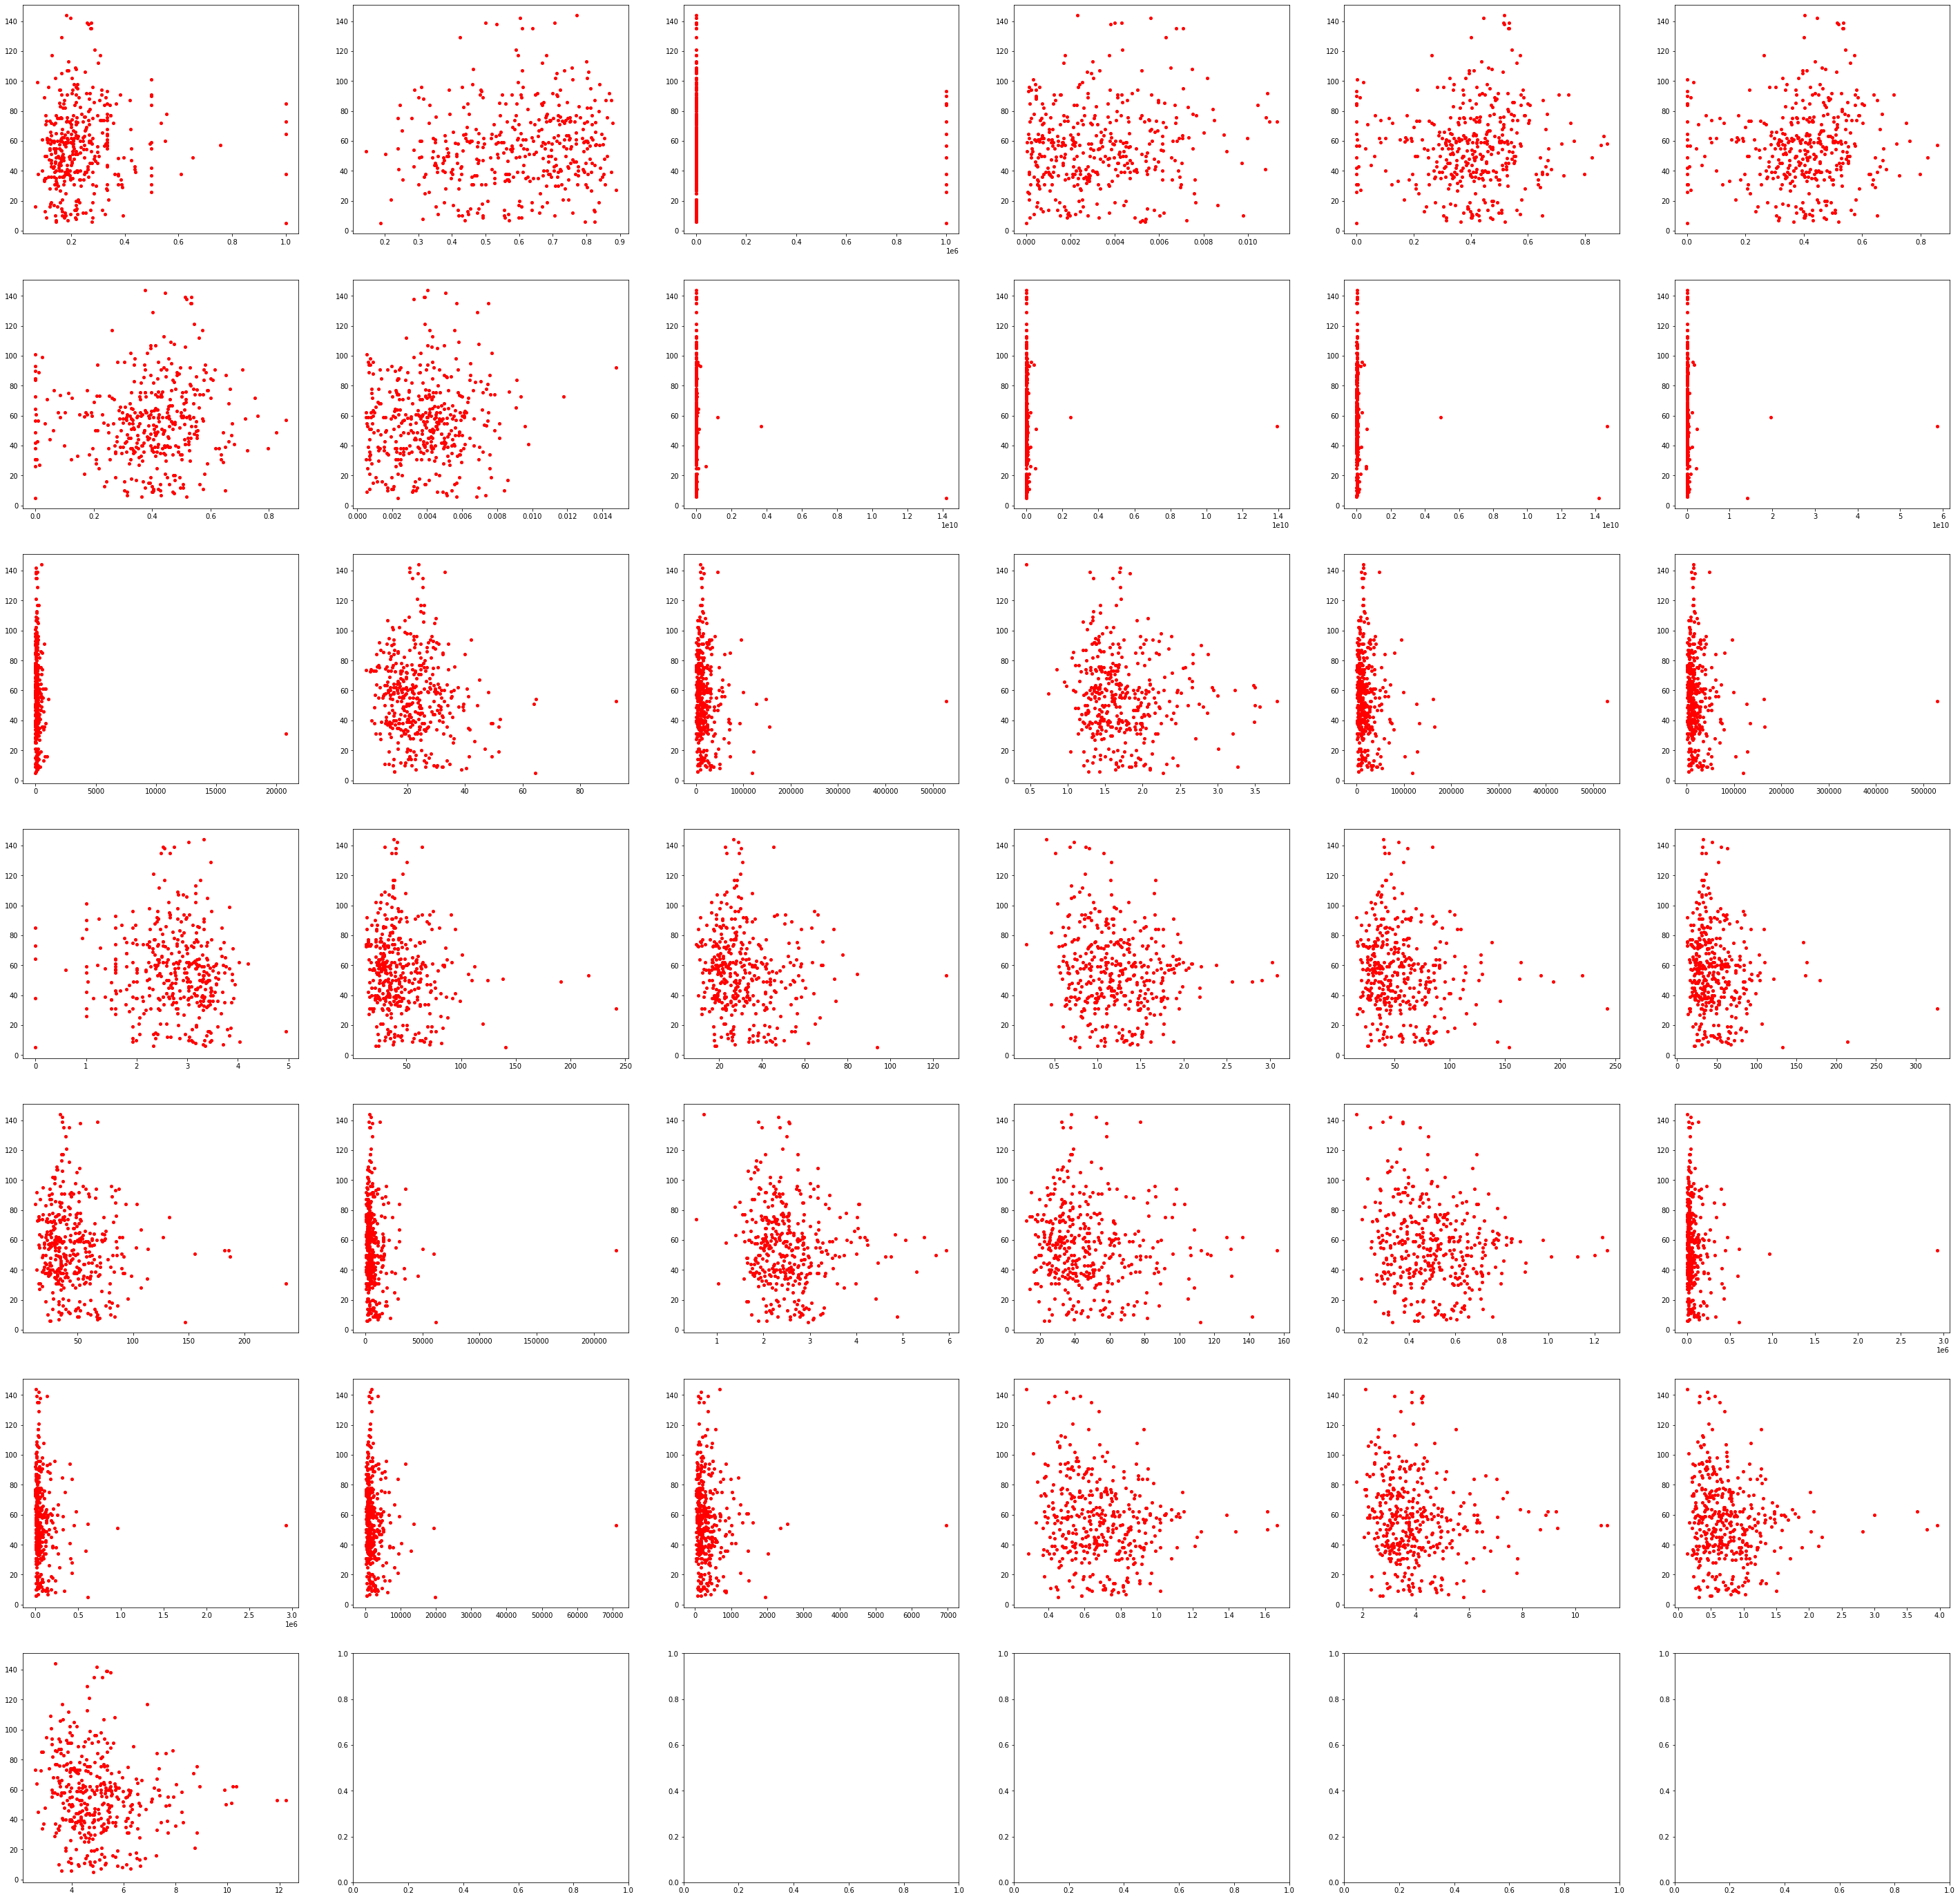

In [22]:
fig, ax = plt.subplots(nrows=len(kendall_sig['index'])//6 + 1, ncols=6, figsize=(50,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
ax = ax.ravel()
for i, col in enumerate(kendall_sig['index'][1:]):
    ax[i].plot(X[col],y,'or',markersize = 4)

<h3>Plotting significant features with Pearson's correlation</h3>

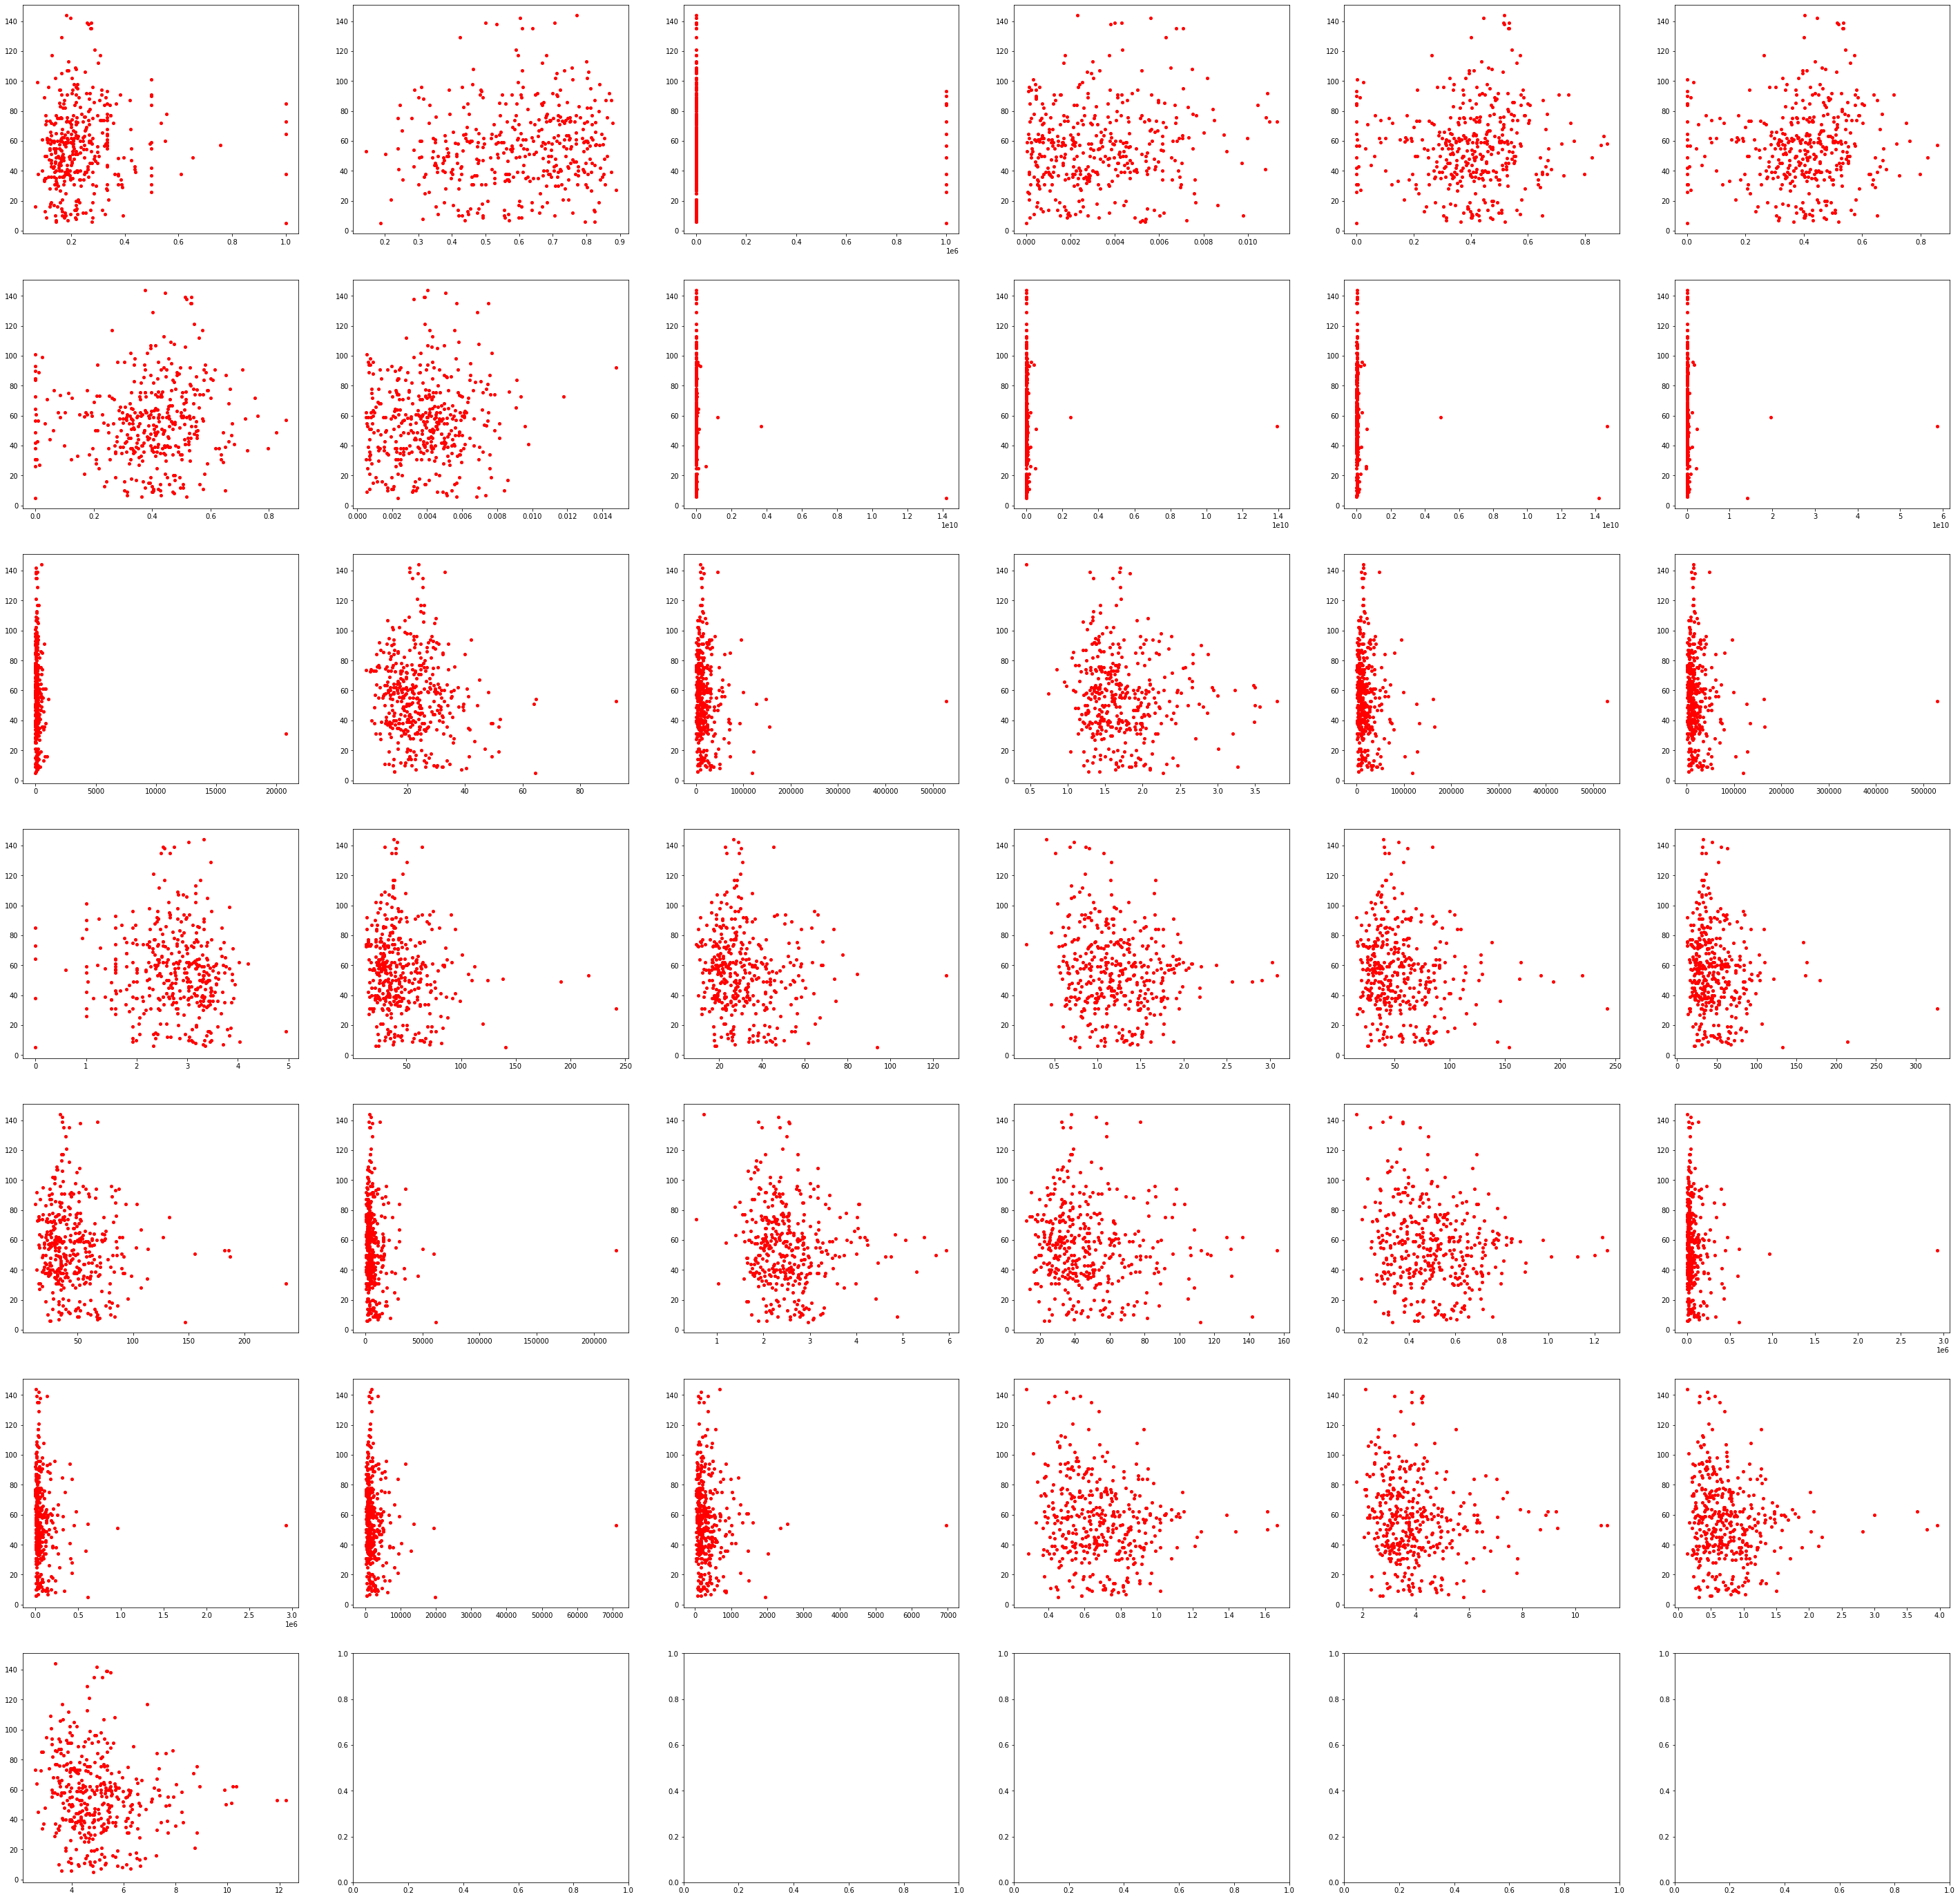

In [23]:
fig, ax = plt.subplots(nrows=len(corr_sig['index'])//6 + 1, ncols=6, figsize=(50,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
ax = ax.ravel()
for i, col in enumerate(corr_sig['index'][1:]):
    ax[i].plot(X[col],y,'or',markersize = 4)

### Conclusion 
    - We can clearly observe that there is no significant difference between the most important feature and the least important feature.
    - Therefore, there is no significant advantage of feature selection.
    - Moreover, different feature selection methods are resulting in different importances of the features due to very difference in the importance or correlation.

<h1>Dimensionality Reduction</h1>

In [24]:
y = pd.DataFrame(df['RelapseFreeSurvival (outcome)'])
X = df.drop(['RelapseFreeSurvival (outcome)','ID'],axis = 1)
X.head()

,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,2.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263.0,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.43

In [25]:
X_img = X.iloc[:,10:]
X_img.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263.0,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.407895,0.184265,0.685680,0.149585,0.907867,0.907867,0.963147,0.938578,-0.149786,0.425720,0.184265,1.806982,0.538903,1

In [26]:
# TSNE dimensionality reduction
from sklearn.manifold import TSNE
X_img = TSNE(n_components=30,method='exact').fit_transform(X_img)
print(X.shape,y.shape)

C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(400, 117) (400, 1)


In [27]:
X_img = pd.DataFrame(X_img)
X_img.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.033646,-0.014556,-0.194029,0.026768,-0.308236,-0.219582,0.207318,-0.019002,0.005918,0.130854,0.147804,0.073641,-0.496304,0.359966,0.405393,0.126683,-0.361167,0.110998,0.091433,0.108124,-0.051385,-0.362090,-0.313013,0.088607,-0.333603,-0.364008,-0.337445,0.230342,0.198615,-0.247453
std,2.262990,1.728991,10.682817,2.136993,5.586075,3.507338,4.588763,2.678586,2.467791,2.464808,1.913317,2.519035,7.325121,5.303068,7.547399,3.823748,6.282178,5.133936,6.154057,8.542345,3.604454,12.194175,4.560162,4.137187,4.942238,6.976147,7.606456,4.644028,3.381518,3.327426
min,-17.117891,-12.892831,-164.973969,-13.259834,-87.372040,-41.833065,-27.570864,-16.714048,-11.840007,-7.237065,-8.506904,-18.437500,-136.321167,-31.748745,-7.919530,-14.586838,-99.311180,-30.511086,-51.770367,-48.547741,-50.314091,-235.909454,-78.035179,-48.352650,-75.110291,-111.001816,-148.902191,-10.684983,-18.628750,-47.466129
25%,-0.625253,-0.695970,-0.953699,-0.636311,-0.811452,-0.777660,-0.819624,-0.715671,-0.741890,-0.903316,-0.544620,-1.030922,-1.039550,-0.573593,-0.738305,-1.095486,-1.673435,-0.928145,-0.989631,-1.442499,-0.823083,-0.801619,-0.650655,-0.652439,-0.691099,-1.448349,-0.764506,-1.321471,-0.825811,-0.617245
50%,0.068157,-0.064274,-0.043032,-0.011597,0.003910,0.042033,-0.009341,0.196183,0.005947,-0.005702,0.050413,-0.096629,0.005379,0.031477,-0.053691,-0.023819,0.005738,-0.001237,0.047410,0.169087,-0.041098,0.047216,0.080178,0.035503,0.012679,-0.082943,0.015972,0.001297,0.064116,0.042584
75%,0.561675,0.619769,1.093325,0.635556,0.930669,0.837653,0.711998,0.702399,0.549925,0.786191,0.681570,1.091883,0.728405,0.796525,0.743771,1.513837,1.619537,0.936805,1.166683,1.020046,0.929314,0.856792,0.592207,0.599183,0.670088,1.257321,0.730881,1.396654,0.894405,0.666667
max,24.597151,11.005356,101.004715,22.850397,35.879627,14.973375,77.183327,30.575439,35.052685,24.384310,19.189829,18.696905,10.853914,67.489220,146.925354,55.673412,23.997469,87.591446,90.563950,150.457901,33.650940,43.962238,11.570435,52.259869,12.574580,43.922249,6.971807,78.697189,39.077618,5.159406


In [28]:
X_img.insert(0,'RelapseFreeSurvival (outcome)',df['RelapseFreeSurvival (outcome)'])
X_img.head()

,RelapseFreeSurvival (outcome),0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,144.0,4.668616,1.163884,-1.315837,0.486928,1.078970,0.782198,-0.231243,0.957699,-0.791372,-0.507853,-0.341901,0.928867,-1.611254,0.644663,0.469079,0.417756,0.914022,-1.928617,-1.039713,-3.021999,2.180893,-0.690232,-0.577180,0.910559,-0.993939,-3.458296,0.586450,-1.848387,2.624809,-0.872789
1,142.0,0.447028,0.119658,0.247702,-0.612056,-3.336243,0.549613,-2.248115,0.923347,-1.094006,-0.927121,1.498399,0.355552,-3.694841,0.079276,-1.190506,0.393021,1.719518,-0.010730,-0.292512,0.026439,-0.074591,-1.884049,-1.281025,-1.695593,-0.552498,-0.961221,-0.774886,-2.025412,1.330136,0.106799
2,135.0,-0.478867,-0.594764,0.466617,0.702477,-0.269993,0.656833,-0.165552,0.725549,-1.063614,-0.003538,-0.493039,-0.406837,-0.934627,1.273636,-0.688253,-0.672525,3.804407,1.577277,3.019214,0.776549,-2.782773,-0.851682,0.305460,-0.689887,1.110774,0.379080,-1.257178,5.013081,1.614655,0.125960
3,12.0,-0.376533,1.603118,-2.674402,2.344810,0.720052,3.950491,-2.744301,-0.316142,-0.399652,0.094699,0.432654,-0.012780,-1.672795,-0.318617,0.829440,0.254855,-2.743042,-0.889550,-2.447137,0.344261,1.539782,-0.083138,0.683235,0.595539,0.393070,-1.730350,1.655624,0.422469,0.517479,-0.434267
4,109.0,2.547868,0.953685,0.008036,-0.805651,-1.054791,0.482570,-1.672361,0.701767,-2.492083,0.722527,-0.517579,2.876169,-1.037290,1.390296,-1.721998,1.969561,1.327744,0.741940,-0.234621,1.258421,0.120057,0.230972,-0.403234,0.823088,0.034504,2.558101,-0.833311,1.379595,0.572800,1.282197


In [29]:
# Kendall's correlation on reduced dimensions
corrMat_kendall = X_img.corr(method = 'kendall')
corrMat_kendall = pd.DataFrame(corrMat_kendall)
corrMat_kendall.sort_values(by = 'RelapseFreeSurvival (outcome)',ascending = False,inplace = True)
corr_kendall = pd.DataFrame(corrMat_kendall['RelapseFreeSurvival (outcome)'])
corr_kendall.reset_index(inplace=True)
corr_kendall.head()

,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,9,0.072820
2,3,0.066527
3,23,0.064161
4,8,0.033327


In [30]:
# Significant features with 0.01 as cutoff for Kendall's correlation
kendall_sig = corr_kendall[(corr_kendall['RelapseFreeSurvival (outcome)']>0.01) | (corr_kendall['RelapseFreeSurvival (outcome)']<-0.02)]
kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)
kendall_sig.head()

<ipython-input-30-6fc7a09e25b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)


,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,9,0.072820
2,3,0.066527
3,23,0.064161
4,8,0.033327


In [31]:
len(kendall_sig)

18

<h3>Plotting reduced dimention features with Kendall's correlation</h3>

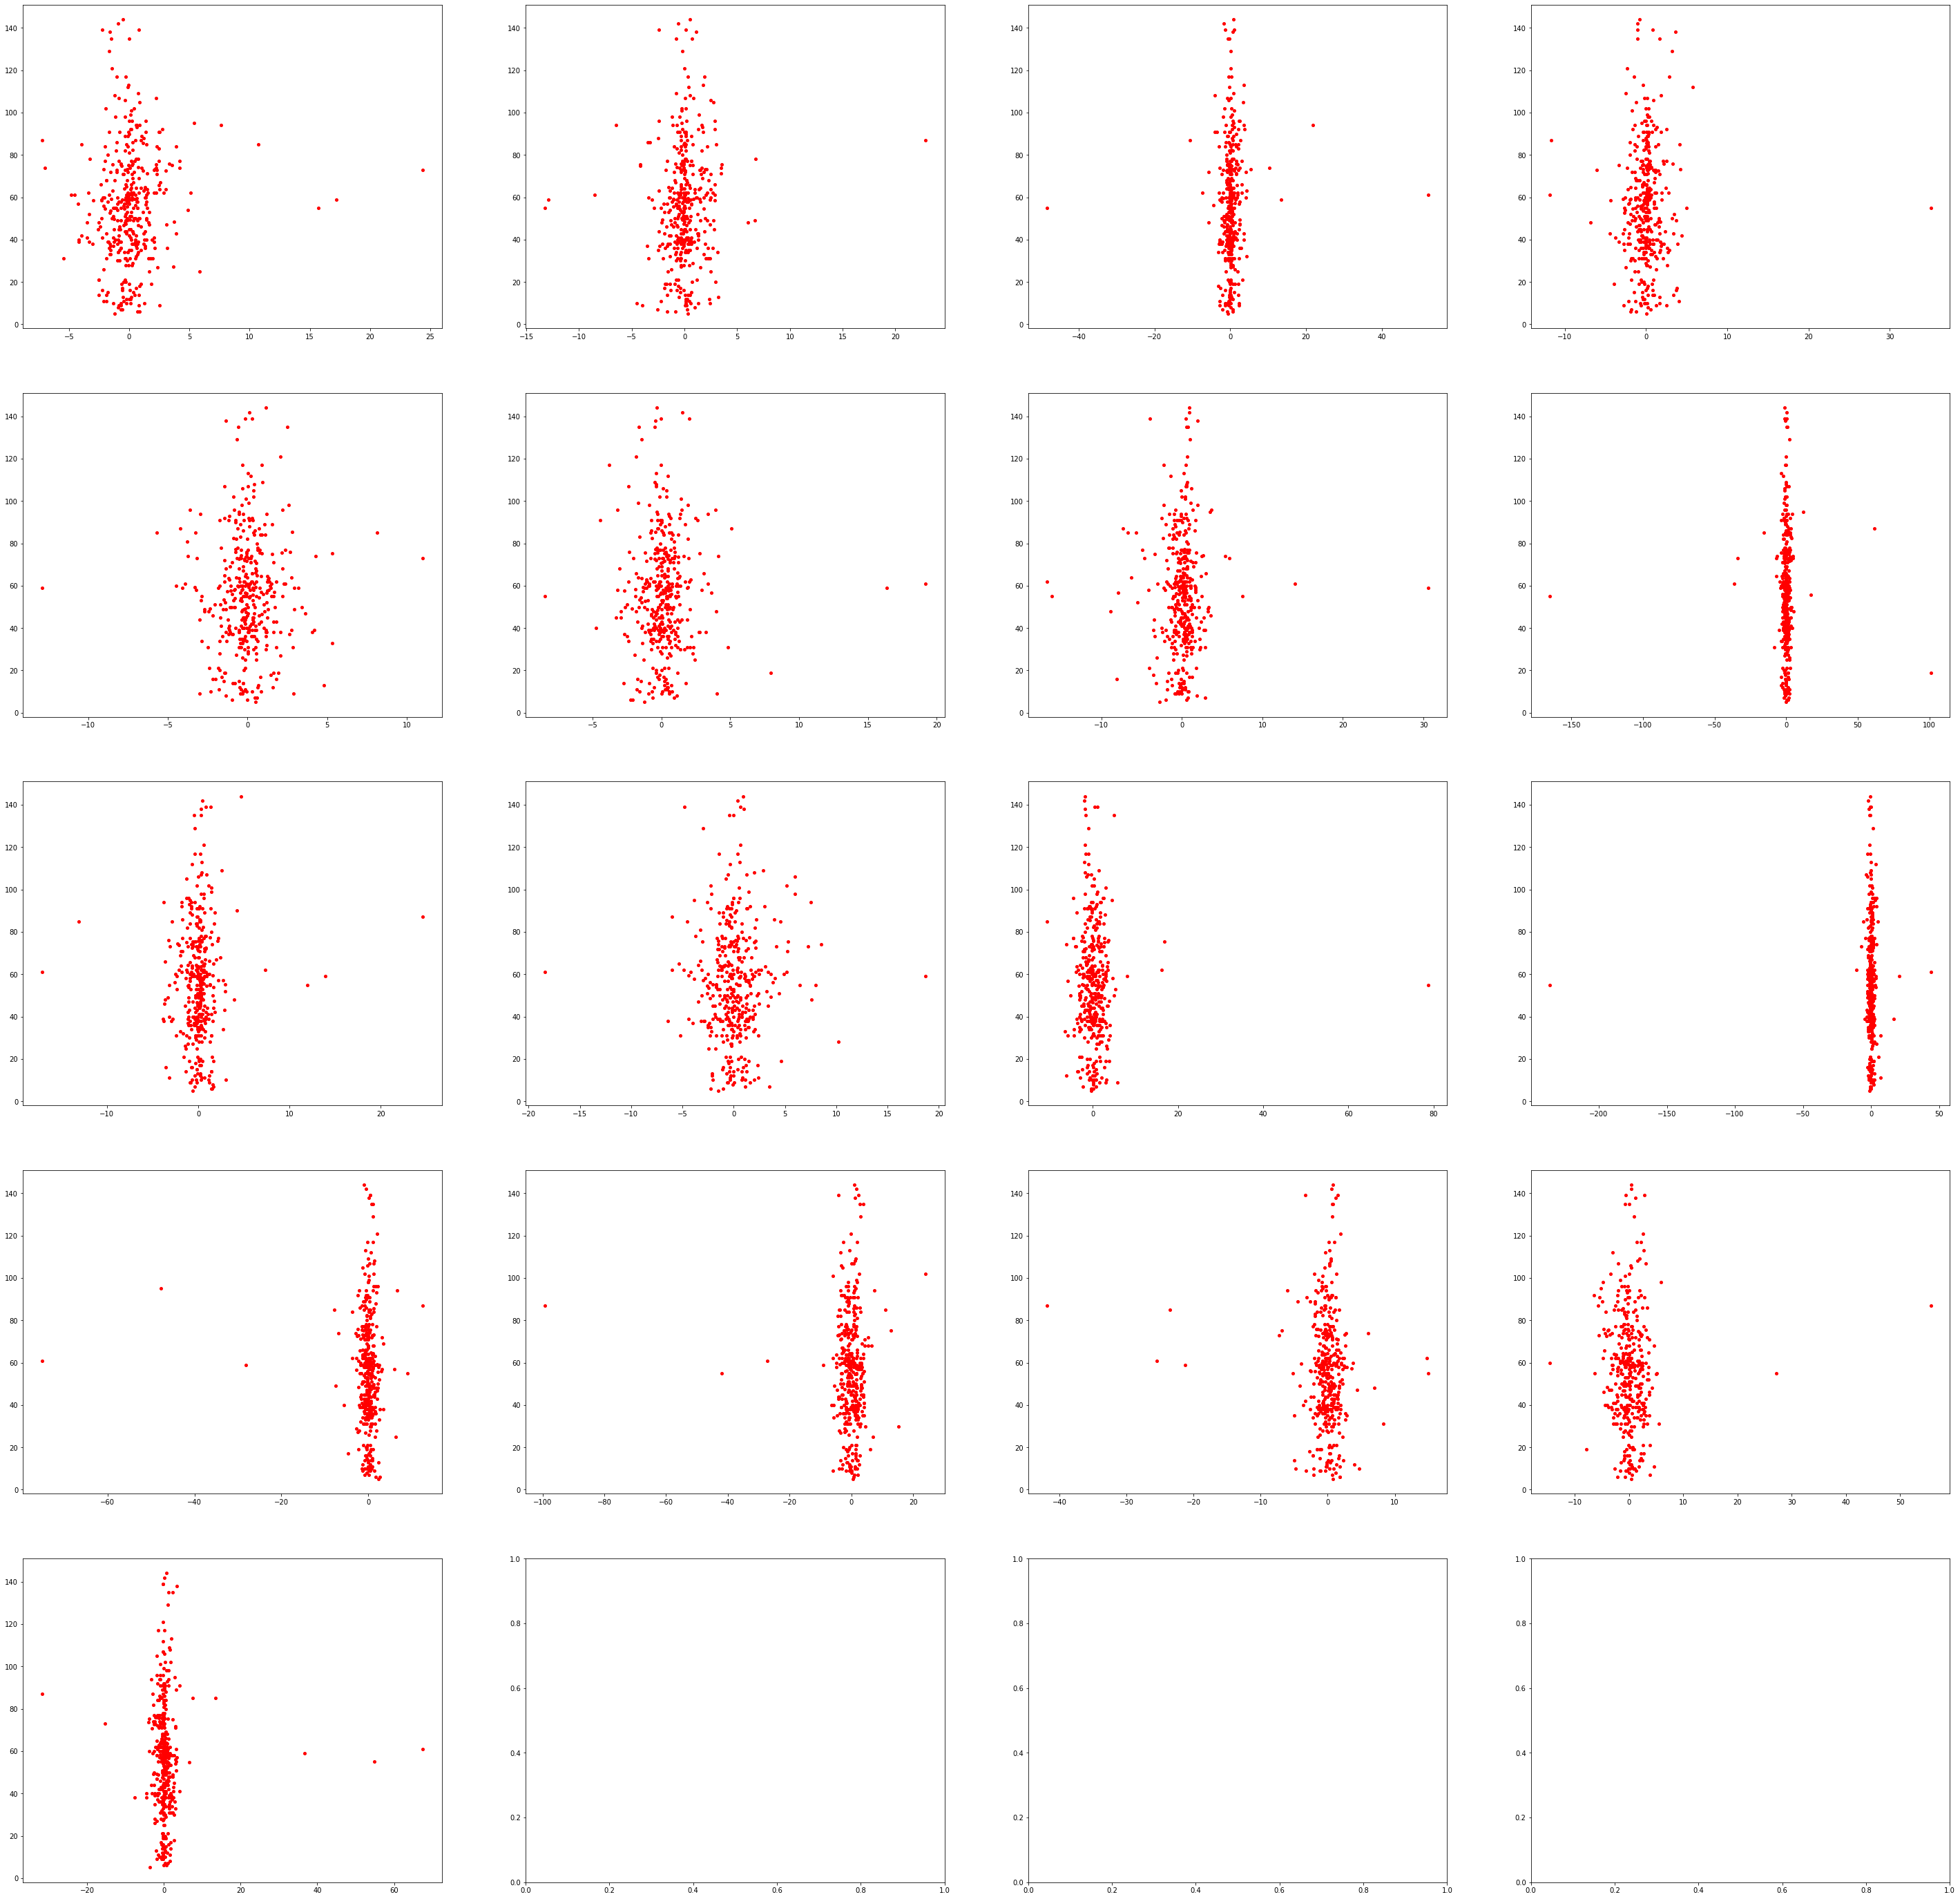

In [32]:
fig, ax = plt.subplots(nrows=len(kendall_sig['index'])//4+1, ncols=4, figsize=(50,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
ax = ax.ravel()
for i, col in enumerate(kendall_sig['index'][1:]):
    ax[i].plot(X_img[col],X_img['RelapseFreeSurvival (outcome)'],'or',markersize = 4)

### Conclusion 
    - Even after dimensionality reduction, the correlation between the new features and the target is very low.

<h1>Models</h1>

<h2>Random Forest</h2>

In [33]:
X.head()

,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,2.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263.0,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.43

In [34]:
# X = np.array(X.iloc[:,1:])
# y = np.array(y)
# print(X.shape,y.shape)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [36]:
print(x_train.shape,y_train.shape)

(320, 117) (320, 1)


In [37]:
# Hyperparameter tuning for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20],
    'max_features': [100, 117],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [10, 20],
    'n_estimators': [600,700]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
rf = grid_search.best_estimator_
rf_pred = rf.predict(x_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, rf_pred)
print(mae)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True, 'max_depth': 20, 'max_features': 100, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 700}
20.87505541883644


In [38]:
# Random Forest model
rf = RandomForestRegressor(n_estimators = 600, max_depth = 5, min_samples_leaf = 10, min_samples_split = 10)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, rf_pred)
print(mae)

<ipython-input-38-06e57e9ec368>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


20.898675720669438


In [39]:
feature_list = list(x_train.columns)

In [40]:
# Random Forest feature importance
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, importance) for feature, importance in zip(x_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feat_import = pd.DataFrame(feature_importances)
feat_import.head(10)

,0,1
0,original_firstorder_Maximum,0.089257
1,original_firstorder_Kurtosis,0.059359
2,original_firstorder_InterquartileRange,0.043710
3,original_firstorder_Range,0.042646
4,original_shape_MinorAxisLength,0.030598
5,original_firstorder_Variance,0.027195
6,original_glszm_SizeZoneNonUniformity,0.027156
7,original_glszm_ZoneEntropy,0.024377
8,Age,0.023805
9,original_firstorder_RobustMeanAbsoluteDeviation,0.018645


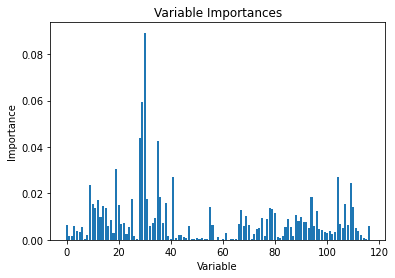

In [41]:
# Plotting the feature importance
import matplotlib.pyplot as plt
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Conclusion
- Only 2 features have importance of more than 0.03. All the other features fall in a very small band.

In [42]:
from sklearn.metrics import mean_absolute_error 
prediction = rf.predict(x_test)
mae = mean_absolute_error(y_test, prediction)
print(mae)

20.898675720669438


<h2>ANN</h2>

In [43]:
# Robust Scaler to treat the ouliers and a minmax scaler to scale down the features.
scaler = RobustScaler()
x_scaled = scaler.fit_transform(X)
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x_scaled)
print(x.shape)

(400, 117)


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [45]:
x_test.shape

(80, 117)

In [65]:
# ANN architecture
model = Sequential([
    
    Dense(units = 240, input_shape = (117,), activation = 'relu'),
    Dropout(0.2),
    Dense(units = 480, activation = 'relu'),
    Dense(units = 480, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)),
    Dense(units = 240, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(units = 120, activation = 'relu'),
    Dense(units = 1, activation = 'relu'),
    
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 240)               28320     
_________________________________________________________________
dropout_6 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 480)               115680    
_________________________________________________________________
dense_20 (Dense)             (None, 480)               230880    
_________________________________________________________________
dense_21 (Dense)             (None, 240)               115440    
_________________________________________________________________
dropout_7 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 120)              

In [66]:
model.compile(optimizer=SGD(learning_rate=0.1), loss='mean_absolute_error')
history = model.fit(x=x_train,y=y_train,epochs=300,verbose=2,validation_split=0.2,batch_size=32)

Epoch 1/300
8/8 - 0s - loss: 386.4654 - val_loss: 185.0855
Epoch 2/300
8/8 - 0s - loss: 188.6981 - val_loss: 178.8773
Epoch 3/300
8/8 - 0s - loss: 185.0715 - val_loss: 176.0320
Epoch 4/300
8/8 - 0s - loss: 179.6685 - val_loss: 169.3747
Epoch 5/300
8/8 - 0s - loss: 161.0338 - val_loss: 138.3458
Epoch 6/300
8/8 - 0s - loss: 140.5359 - val_loss: 138.5833
Epoch 7/300
8/8 - 0s - loss: 139.9778 - val_loss: 130.4948
Epoch 8/300
8/8 - 0s - loss: 133.7712 - val_loss: 127.0971
Epoch 9/300
8/8 - 0s - loss: 129.4286 - val_loss: 125.1230
Epoch 10/300
8/8 - 0s - loss: 125.8107 - val_loss: 126.1485
Epoch 11/300
8/8 - 0s - loss: 122.2384 - val_loss: 117.0852
Epoch 12/300
8/8 - 0s - loss: 119.1748 - val_loss: 114.2950
Epoch 13/300
8/8 - 0s - loss: 116.6724 - val_loss: 113.6731
Epoch 14/300
8/8 - 0s - loss: 113.6743 - val_loss: 111.0134
Epoch 15/300
8/8 - 0s - loss: 112.7436 - val_loss: 106.6865
Epoch 16/300
8/8 - 0s - loss: 107.7466 - val_loss: 104.1877
Epoch 17/300
8/8 - 0s - loss: 105.7714 - val_loss

8/8 - 0s - loss: 22.5497 - val_loss: 21.2404
Epoch 142/300
8/8 - 0s - loss: 22.7071 - val_loss: 21.0342
Epoch 143/300
8/8 - 0s - loss: 22.4734 - val_loss: 21.1157
Epoch 144/300
8/8 - 0s - loss: 22.3593 - val_loss: 20.0547
Epoch 145/300
8/8 - 0s - loss: 22.7825 - val_loss: 20.4228
Epoch 146/300
8/8 - 0s - loss: 22.2869 - val_loss: 21.0452
Epoch 147/300
8/8 - 0s - loss: 22.3111 - val_loss: 20.3034
Epoch 148/300
8/8 - 0s - loss: 22.2155 - val_loss: 20.8400
Epoch 149/300
8/8 - 0s - loss: 22.2877 - val_loss: 20.3965
Epoch 150/300
8/8 - 0s - loss: 22.1417 - val_loss: 20.2291
Epoch 151/300
8/8 - 0s - loss: 22.2518 - val_loss: 20.2687
Epoch 152/300
8/8 - 0s - loss: 22.1295 - val_loss: 21.4081
Epoch 153/300
8/8 - 0s - loss: 22.0664 - val_loss: 20.3841
Epoch 154/300
8/8 - 0s - loss: 22.0039 - val_loss: 20.5392
Epoch 155/300
8/8 - 0s - loss: 22.1458 - val_loss: 20.3007
Epoch 156/300
8/8 - 0s - loss: 22.1328 - val_loss: 20.0655
Epoch 157/300
8/8 - 0s - loss: 22.0886 - val_loss: 20.3856
Epoch 158/3

8/8 - 0s - loss: 20.9025 - val_loss: 19.1490
Epoch 281/300
8/8 - 0s - loss: 20.7687 - val_loss: 20.3411
Epoch 282/300
8/8 - 0s - loss: 20.9707 - val_loss: 18.8994
Epoch 283/300
8/8 - 0s - loss: 21.1042 - val_loss: 19.2910
Epoch 284/300
8/8 - 0s - loss: 20.9574 - val_loss: 19.0772
Epoch 285/300
8/8 - 0s - loss: 20.9237 - val_loss: 19.0981
Epoch 286/300
8/8 - 0s - loss: 21.0735 - val_loss: 19.2397
Epoch 287/300
8/8 - 0s - loss: 20.9563 - val_loss: 19.2687
Epoch 288/300
8/8 - 0s - loss: 20.8890 - val_loss: 20.0391
Epoch 289/300
8/8 - 0s - loss: 21.0495 - val_loss: 19.1991
Epoch 290/300
8/8 - 0s - loss: 21.0090 - val_loss: 18.7755
Epoch 291/300
8/8 - 0s - loss: 20.8230 - val_loss: 19.7430
Epoch 292/300
8/8 - 0s - loss: 20.9320 - val_loss: 19.1221
Epoch 293/300
8/8 - 0s - loss: 20.9393 - val_loss: 19.6213
Epoch 294/300
8/8 - 0s - loss: 21.0176 - val_loss: 19.6273
Epoch 295/300
8/8 - 0s - loss: 21.2143 - val_loss: 19.2811
Epoch 296/300
8/8 - 0s - loss: 20.8572 - val_loss: 19.7211
Epoch 297/3

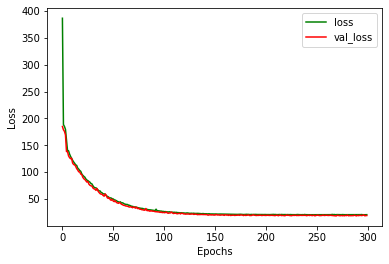

In [67]:
# Loss vs Epochs plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(0,300)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [68]:
model.evaluate(x=x_test,y=y_test)
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 4ms/step - loss: 20.8496


In [69]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

20.829357020060222


In [64]:
model.save('saved_model/best_model_aucc82')

INFO:tensorflow:Assets written to: saved_model/best_model_aucc82\assets


<h1>Saving model objects to run on test</h1>

In [52]:
import pickle

# save the imputer to disk
filename = 'saved_model/float_cols_imputer.sav'
pickle.dump(sif, open(filename, 'wb'))


filename = 'saved_model/int_cols_imputer.sav'
pickle.dump(sic, open(filename, 'wb'))


# save the transformer to disk
filename = 'saved_model/robust_scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))

# save the scaler to disk
filename = 'saved_model/min_max_scaler.sav'
pickle.dump(min_max_scaler, open(filename, 'wb'))

# Continuous columns list
filename = 'saved_model/continuous_features.pkl'
pickle.dump({'continuous_features':float_cols}, open(filename, 'wb'))

# Categorical columns
filename = 'saved_model/categorical_features.pkl'
pickle.dump({'categorical_features':cat_cols}, open(filename, 'wb'))

